In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('covid.train.csv')
train_data.head()

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,...,work_outside_home.4,shop.4,restaurant.4,spent_time.4,large_event.4,public_transit.4,anxious.4,depressed.4,worried_finances.4,tested_positive.4
0,0,0,0,0,0,0,0,0,1,0,...,31.113209,67.394551,36.674291,40.743132,17.842221,4.093712,10.440071,8.627117,37.329512,7.456154
1,1,0,0,0,0,0,1,0,0,0,...,33.920257,64.398380,34.612238,44.035688,17.808103,4.924935,10.172662,9.954333,32.508881,8.010957
2,2,0,0,0,0,0,0,0,0,0,...,31.604604,62.101064,26.521875,36.746453,13.903667,7.313833,10.388712,7.956139,36.745588,2.906977
3,3,0,0,0,0,0,0,0,0,0,...,35.115738,67.935520,38.022492,48.434809,27.134876,3.101904,10.498683,8.231522,38.680162,12.575816
4,4,0,0,0,0,0,0,0,0,0,...,35.129714,69.934592,38.242368,49.095933,22.683709,4.594620,9.878927,9.469290,28.344123,21.428589


In [3]:
train_data['tested_positive.4'].describe()

count    2699.000000
mean        9.819307
std         6.431729
min         0.344828
25%         4.928581
50%         7.670341
75%        13.841567
max        30.304636
Name: tested_positive.4, dtype: float64

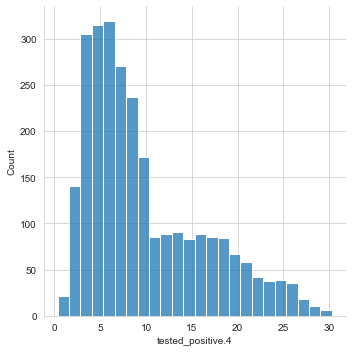

In [4]:
sns.displot(train_data['tested_positive.4'])

In [5]:
# 将不是object，而是数值的数据的列的名称取出来
quantitative = [feature for feature in train_data.loc[:,'WA':] if train_data.dtypes[feature] != 'object']
# 房价自己也要除去
quantitative.remove('tested_positive.4')
quantitative

['WA',
 'cli',
 'ili',
 'hh_cmnty_cli',
 'nohh_cmnty_cli',
 'wearing_mask',
 'travel_outside_state',
 'work_outside_home',
 'shop',
 'restaurant',
 'spent_time',
 'large_event',
 'public_transit',
 'anxious',
 'depressed',
 'worried_finances',
 'tested_positive',
 'cli.1',
 'ili.1',
 'hh_cmnty_cli.1',
 'nohh_cmnty_cli.1',
 'wearing_mask.1',
 'travel_outside_state.1',
 'work_outside_home.1',
 'shop.1',
 'restaurant.1',
 'spent_time.1',
 'large_event.1',
 'public_transit.1',
 'anxious.1',
 'depressed.1',
 'worried_finances.1',
 'tested_positive.1',
 'cli.2',
 'ili.2',
 'hh_cmnty_cli.2',
 'nohh_cmnty_cli.2',
 'wearing_mask.2',
 'travel_outside_state.2',
 'work_outside_home.2',
 'shop.2',
 'restaurant.2',
 'spent_time.2',
 'large_event.2',
 'public_transit.2',
 'anxious.2',
 'depressed.2',
 'worried_finances.2',
 'tested_positive.2',
 'cli.3',
 'ili.3',
 'hh_cmnty_cli.3',
 'nohh_cmnty_cli.3',
 'wearing_mask.3',
 'travel_outside_state.3',
 'work_outside_home.3',
 'shop.3',
 'restaurant.3',


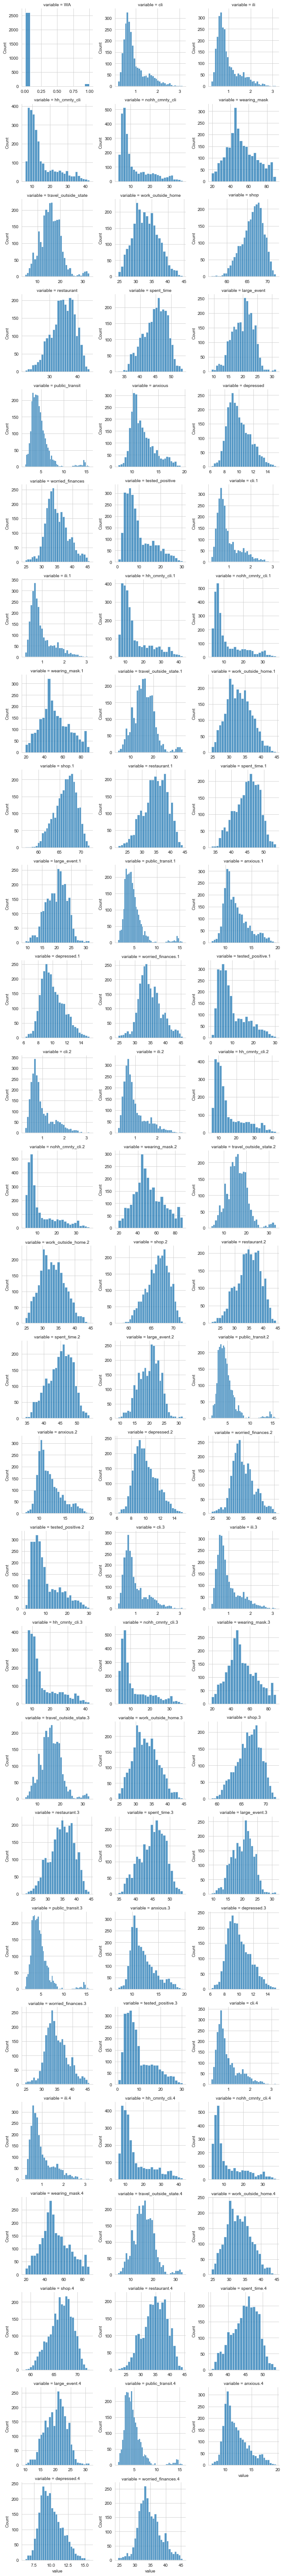

In [6]:
m_cont = pd.melt(train_data, value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=3, sharex=False, sharey=False,height=3)
g.map(sns.histplot, 'value')

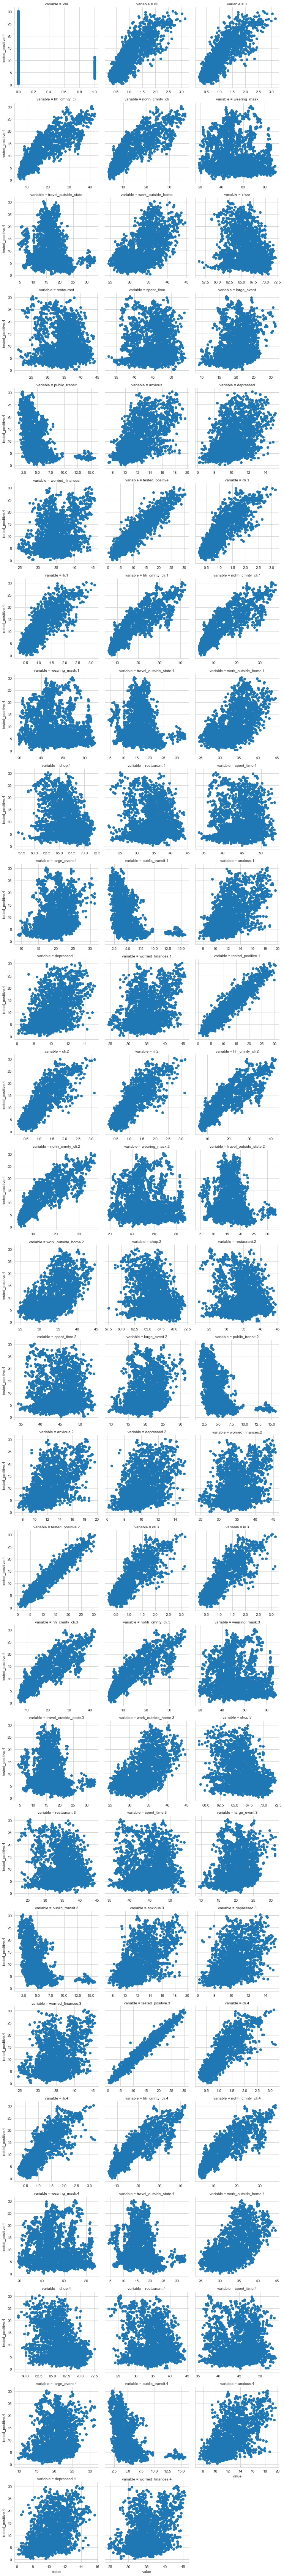

In [7]:
m_cont = pd.melt(train_data,id_vars='tested_positive.4',value_vars = quantitative)
g = sns.FacetGrid(m_cont,col='variable',col_wrap=3,sharex=False,sharey=True,height=3.5)
g.map(plt.scatter,'value','tested_positive.4')